## Looking at data from susann
### Monthly means, era5 and erai, 2007-2018, 1979-2019


In [161]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
import datetime
import cartopy as ccrs

In [162]:
from func import makezonal_season_tpz, make_monthly_tpz, getMonthName

In [163]:
df = xr.open_dataset('FULL-ERA5.monthmean.2007-2018.concat_new.nc')
df2 = xr.open_dataset('erai.tp.monmean.nc')
obs = xr.open_dataset('GPS-RO__CP_LR_5x5_2007-2018.nc')

In [164]:
df_trop = df.sel(lat=slice(-30,30))
df.close()
df2_trop = df2.sel(lat = slice(30,-30), time = slice('2007-01-16T09:00:00.000000000','2018-12-16T09:00:00.000000000')) #, '2017-2-16T09:00:00.000000000' ))
df2.close()

In [165]:
obs_monmean = obs.resample(time='M', keep_attrs=True).mean()

In [166]:
#df.sel(time=slice('2011-01-01T00:00:00.000000000','2018-12-01T00:00:00.000000000')).to_netcdf("FULL-ERA5.tp.monthmean.2010-2018.nc")

In [167]:
#df_trop = df.sel(lat=slice(-30,30), time = slice('2011-01-16T09:00:00.000000000', '2018-12-16T09:00:00.000000000'))
#df.close()
#df2_trop = df2.sel(lat = slice(30,-30), time = slice('2011-01-16T09:00:00.000000000','2018-12-16T09:00:00.000000000')) #, '2017-2-16T09:00:00.000000000' ))
#df2.close()


In [168]:
#obs_monmean = obs_monmean.sel(time=slice('2011-01-31', '2018-12-31'))


In [186]:
obs_monmean

<xarray.Dataset>
Dimensions:  (lat: 13, lon: 72, time: 144)
Coordinates:
  * time     (time) datetime64[ns] 2007-01-31 2007-02-28 ... 2018-12-31
  * lon      (lon) float64 -177.5 -172.5 -167.5 -162.5 ... 167.5 172.5 177.5
  * lat      (lat) float64 -30.0 -25.0 -20.0 -15.0 -10.0 ... 15.0 20.0 25.0 30.0
Data variables:
    CP_T     (time, lat, lon) float32 198.25589 198.69275 ... 198.34766
    CP_z     (time, lat, lon) float32 17.143688 17.19007 ... 17.73085 17.878174
    LR_T     (time, lat, lon) float32 199.38171 199.53966 ... 201.023 202.18922
    LR_z     (time, lat, lon) float32 16.194988 16.283869 ... 15.448836

In [187]:
ea_monthly_cpt = make_monthly_tpz(df_trop)
ea_monthly_lrt = make_monthly_tpz(df_trop, lrt = True)

In [190]:
ei_monthly_cpt = make_monthly_tpz(df2_trop)
ei_monthly_lrt = make_monthly_tpz(df2_trop, lrt = True)

In [200]:
obs_mon = obs_monmean.groupby('time.month').mean(dim='time')

obs_mon_cptt = np.zeros(obs_mon.month.shape[0])
obs_mon_cptz = np.zeros(obs_mon.month.shape[0])
obs_mon_lrtt = np.zeros(obs_mon.month.shape[0])
obs_mon_lrtz = np.zeros(obs_mon.month.shape[0])

for i in range(len(obs_mon.month)):
    obs_mon_cptt[i] = obs_mon.CP_T[i,:,:].mean()
    obs_mon_cptz[i] = obs_mon.CP_z[i,:,:].mean()
    obs_mon_lrtt[i] = obs_mon.LR_T[i,:,:].mean()
    obs_mon_lrtz[i] = obs_mon.LR_z[i,:,:].mean()

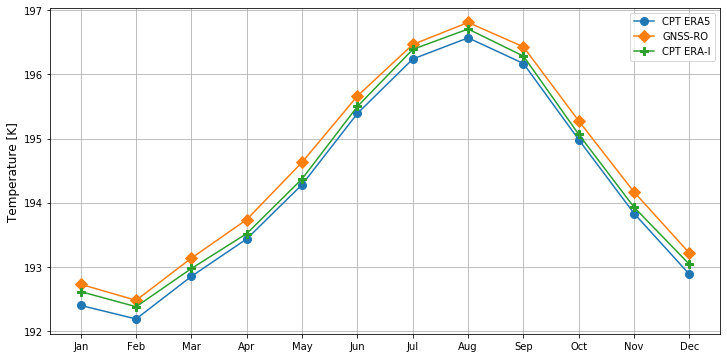

In [192]:
mon = np.linspace(1,12,12, dtype=int)

plt.figure(figsize=(12,6))
plt.plot(mon, ea_monthly_cpt[0], '-o', ms = 8,label = "CPT ERA5")
#plt.plot(mon, ea_monthly_lrt[0], marker='P', ms = 8,label = "LRT ERA5")
plt.plot(mon, obs_mon_cptt, marker = 'D', ms = 8, label = 'GNSS-RO')
plt.plot(mon, ei_monthly_cpt[0], marker = 'P', ms = 8, label = 'CPT ERA-I')

plt.ylabel("Temperature [K]", fontsize=12)

plt.gca().xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))

plt.legend()
plt.grid()

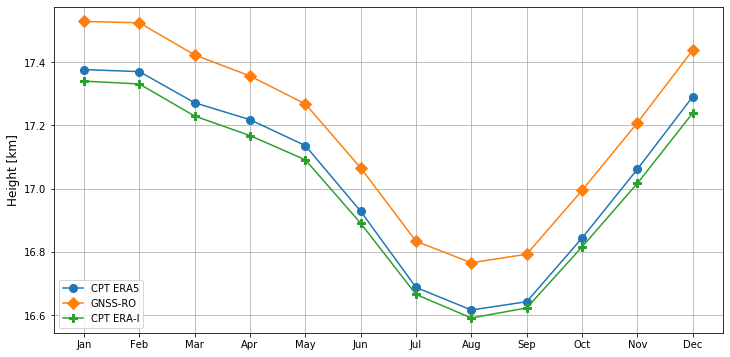

In [193]:
mon = np.linspace(1,12,12, dtype=int)

plt.figure(figsize=(12,6))
plt.plot(mon, ea_monthly_cpt[2], '-o', ms = 8,label = "CPT ERA5")
#plt.plot(mon, ea_monthly_lrt[2], marker='P', ms = 8,label = "LRT ERA5")
plt.plot(mon, obs_mon_cptz, marker = 'D', ms = 8, label = 'GNSS-RO')
plt.plot(mon, ei_monthly_cpt[2], marker = 'P', ms = 8, label = 'CPT ERA-I')

plt.ylabel("Height [km]", fontsize = 12)

plt.gca().xaxis.set_major_locator(mtick.FixedLocator(mon)) # Set tick locations
plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x,p:getMonthName(x)))

plt.legend()
plt.grid()

In [201]:
df_diff_t  = pd.DataFrame({'era5 - obs' :   ea_monthly_cpt[0]-obs_mon_cptt, 
                        'ei - obs' : ei_monthly_cpt[0] - obs_mon_cptt, 
                        'diff era5 - diff erai': (obs_mon_cptt - ea_monthly_cpt[0]) - (obs_mon_cptt - ei_monthly_cpt[0])}, index = mon)

df_diff_z  = pd.DataFrame({'era5 - obs' : ea_monthly_cpt[2] - obs_mon_cptz, 
                        'ei - obs' : ei_monthly_cpt[2] - obs_mon_cptz , 
                        'era5 - erai': ea_monthly_cpt[2] - ei_monthly_cpt[2]}, index = mon)

df_diff_lrtt = pd.DataFrame({'era5 - obs' :   ea_monthly_lrt[0]-obs_mon_lrtt, 
                        'ei - obs' : ei_monthly_lrt[0] - obs_mon_lrtt})

df_diff_lrtz = pd.DataFrame({'era5 - obs' :   ea_monthly_lrt[2]-obs_mon_lrtz, 
                             'ei - obs' : ei_monthly_lrt[2] - obs_mon_lrtz})

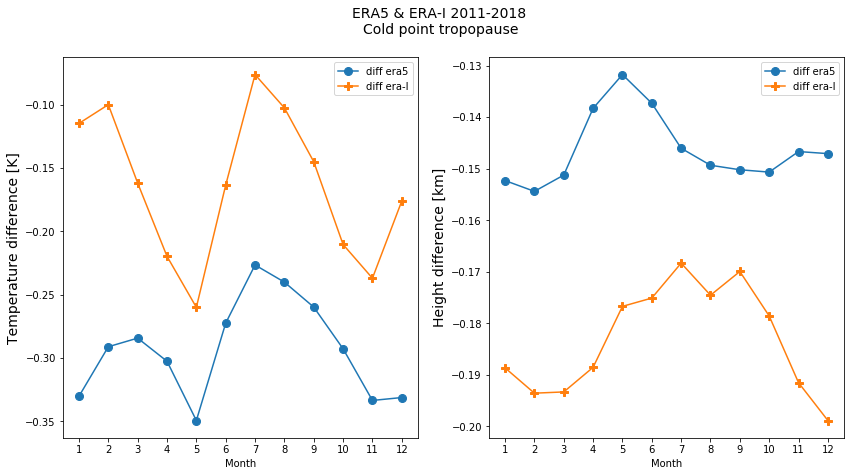

In [195]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("ERA5 & ERA-I 2011-2018 \nCold point tropopause", fontsize=14)

axs[0].plot(mon, df_diff_t['era5 - obs'], '-o', ms = 8,label = 'diff era5')
axs[0].plot(mon, df_diff_t['ei - obs'],  marker = 'P', ms = 8, label = 'diff era-I')
axs[0].set_ylabel('Temperature difference [K]',fontsize=14)

axs[1].plot(mon, df_diff_z['era5 - obs'], '-o', ms = 8, label = 'diff era5')
axs[1].plot(mon, df_diff_z['ei - obs'], marker = 'P', ms = 8, label = 'diff era-I')
axs[1].set_ylabel('Height difference [km]',fontsize=14)

for ax in axs:
    ax.legend()
    ax.set(xlabel = 'Month', xticks = mon)

#plt.savefig('diff_era5_eraI_GNSS_RO_2007-20018_CPT.pdf')

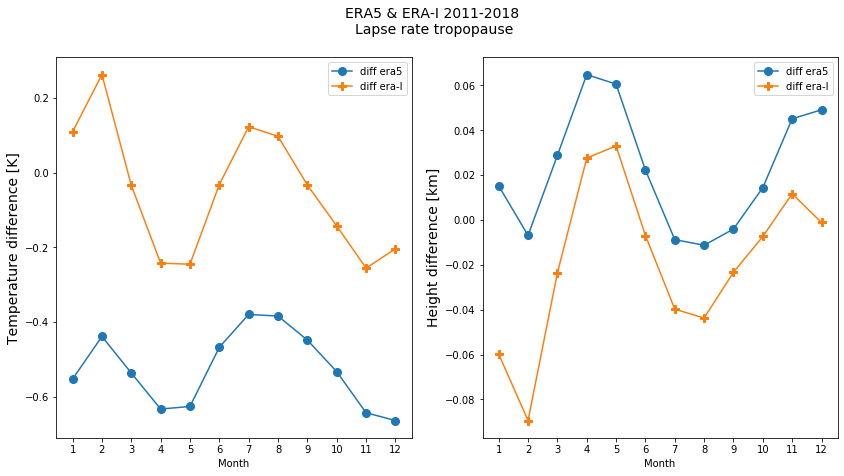

In [202]:
fig, axs = plt.subplots(1, 2, figsize=(14, 7))
fig.suptitle("ERA5 & ERA-I 2011-2018 \nLapse rate tropopause", fontsize=14)

axs[0].plot(mon, df_diff_lrtt['era5 - obs'], '-o', ms = 8,label = 'diff era5')
axs[0].plot(mon, df_diff_lrtt['ei - obs'],  marker = 'P', ms = 8, label = 'diff era-I')
axs[0].set_ylabel('Temperature difference [K]',fontsize=14)

axs[1].plot(mon, df_diff_lrtz['era5 - obs'], '-o', ms = 8, label = 'diff era5')
axs[1].plot(mon, df_diff_lrtz['ei - obs'], marker = 'P', ms = 8, label = 'diff era-I')
axs[1].set_ylabel('Height difference [km]',fontsize=14)

for ax in axs:
    ax.legend()
    ax.set(xlabel = 'Month', xticks = mon)
